Importing depedencies

In [20]:
# print(sys.path)
import numpy as np  #for arrays
import pandas as pd  #for dataframes
from sklearn.model_selection import train_test_split #for splitting data into train and test sets
from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.metrics import accuracy_score #for accuracy score needed to evaluate model
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns #for plotting graphs

Data collection and pre-processing

In [21]:
# loading dataframe to pandas
heart_dataFrame=pd.read_csv('heart_cleveland_upload.csv')
# printing first 5 rows of dataframe

In [22]:
# Checking of rows and columns in dataframe
heart_dataFrame.tail(100)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
197,61,1,3,148,203,0,0,161,0,0.0,0,1,2,1
198,60,1,3,130,206,0,2,132,1,2.4,1,2,2,1
199,60,1,3,145,282,0,2,142,1,2.8,1,2,2,1
200,60,1,3,125,258,0,2,141,1,2.8,1,1,2,1
201,60,0,3,150,258,0,2,157,0,2.6,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [23]:
# Checking total No. of rows and columns
print(heart_dataFrame.shape)

(297, 14)


In [24]:
# All info about dataframe
print(heart_dataFrame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None


In [25]:
# Null values identification
heart_dataFrame.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [26]:
# statistical measures on dataframe
heart_dataFrame.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Correlation between the features

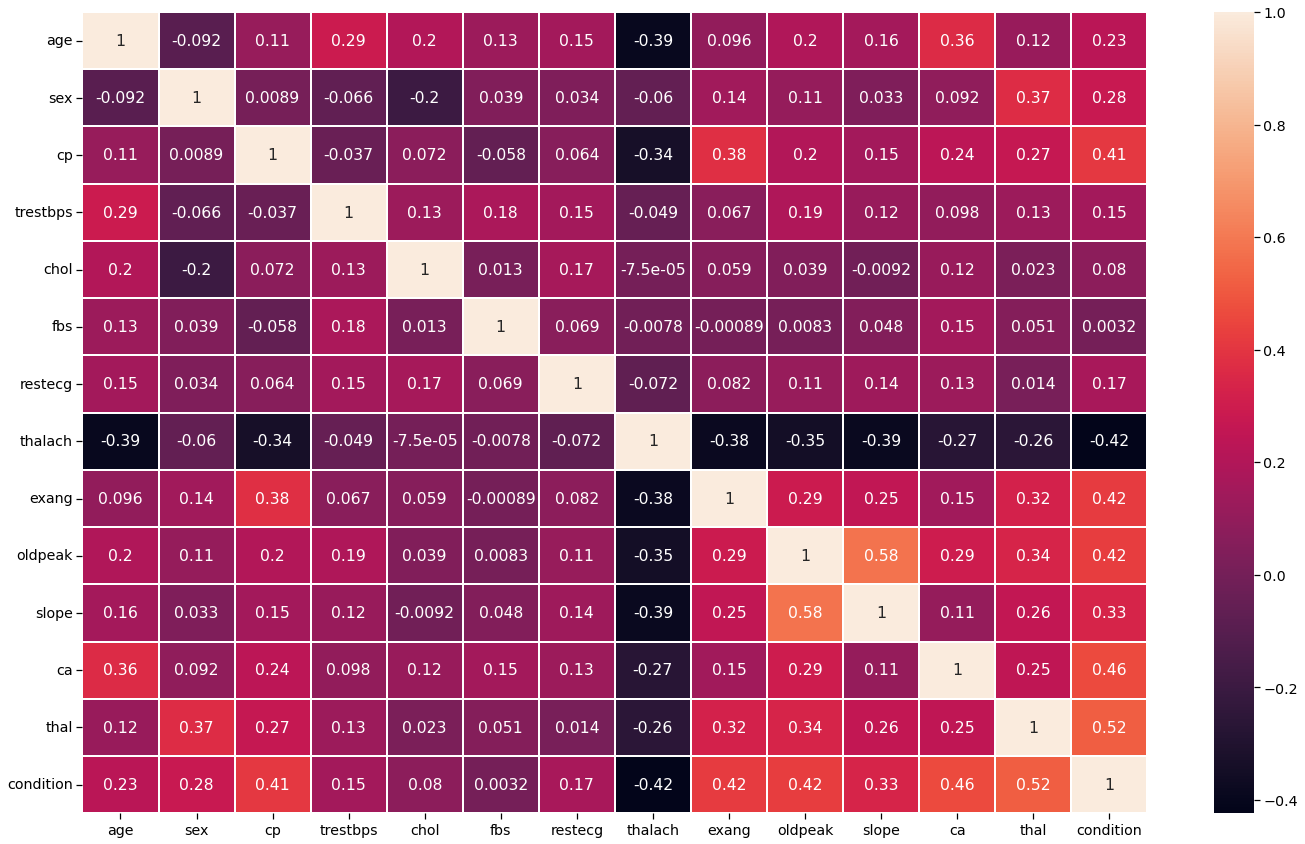

In [28]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(heart_dataFrame.corr(),annot=True,linewidth =2)
plt.tight_layout()

Correlation between the target variable 

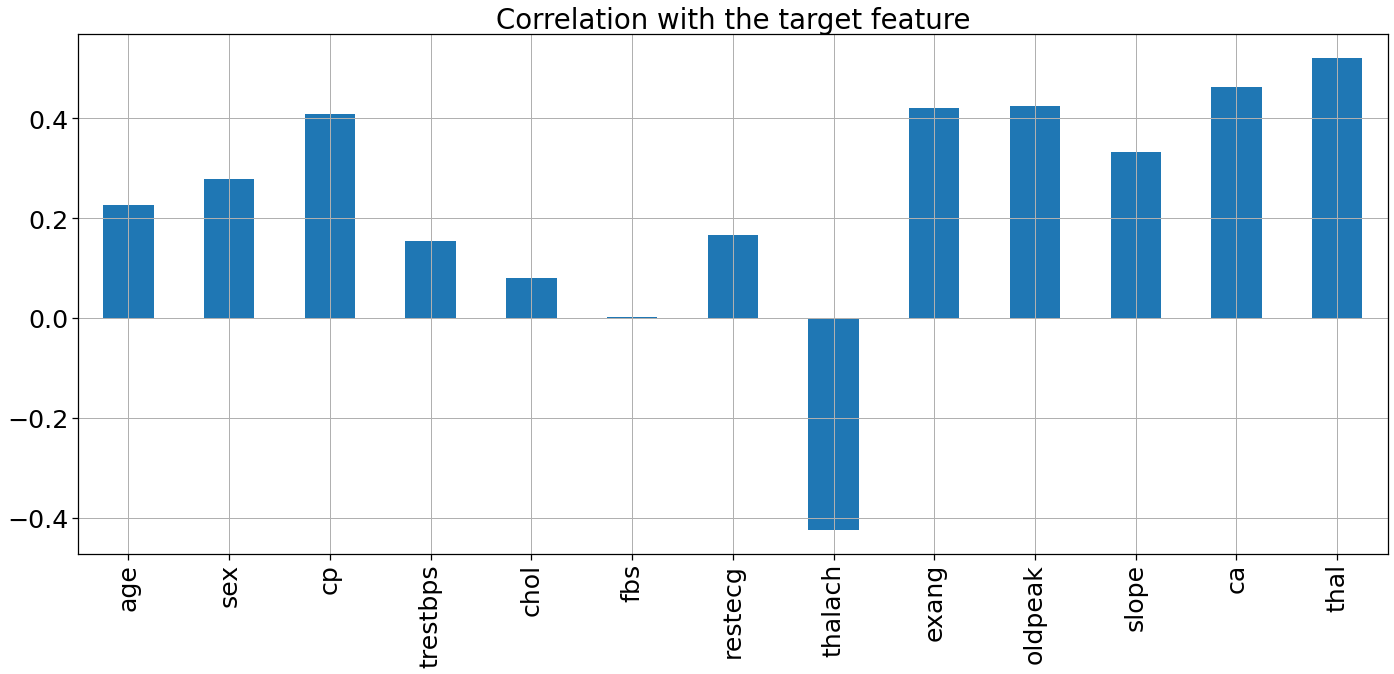

In [30]:
sns.set_context('notebook',font_scale = 2.3)
heart_dataFrame.drop('condition', axis=1).corrwith(heart_dataFrame.condition).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

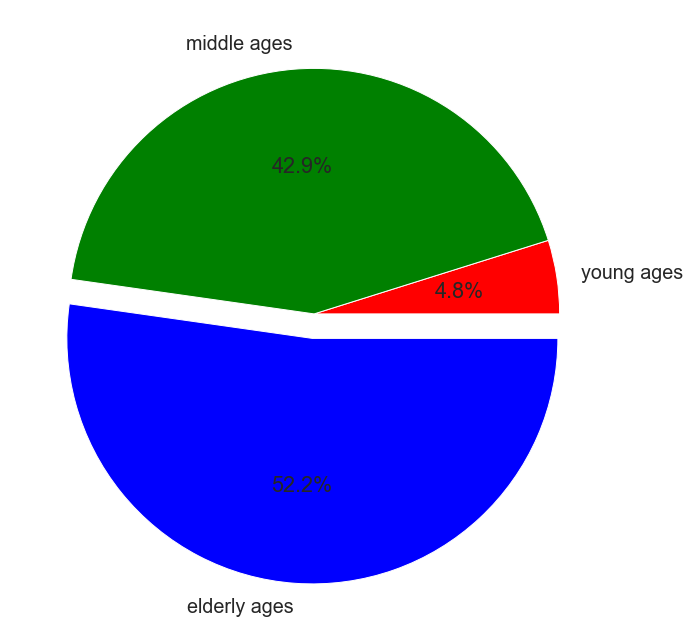

In [37]:
Young = heart_dataFrame[(heart_dataFrame.age>=29)&(heart_dataFrame.age<40)]
Middle = heart_dataFrame[(heart_dataFrame.age>=40)&(heart_dataFrame.age<55)]
Elder = heart_dataFrame[(heart_dataFrame.age>55)]

colors = ['red','green','blue']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.8)
sns.set_style('whitegrid')
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()


In [ ]:
# Distribution of target variable
heart_dataFrame['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

1 -> Heart with disease

2 -> Heart is Healthy


Splitting the Condtion column

In [ ]:
x= heart_dataFrame.drop(columns='condition',axis=1)
y= heart_dataFrame['condition']

In [ ]:
print (y)

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64


To split the data for Training and Testing

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
print(x.shape,x_train.shape,x_test.shape)
# 80% of data goes to train data and 20% goes to test data.

(297, 13) (237, 13) (60, 13)


Model training

Logistic regresion model

In [ ]:
model=LogisticRegression(random_state=0,multi_class='multinomial',penalty='none',solver='newton-cg')
model.fit(x_train.values,y_train.values)

LogisticRegression(multi_class='multinomial', penalty='none', random_state=0,
                   solver='newton-cg')

Model evaluation

In [ ]:
# Training accuracy score
x_training_pred=model.predict(x_train)
training_data_accuracy=accuracy_score(x_training_pred,y_train)
print("Training accuracy score:",training_data_accuracy)

Training accuracy score: 0.8565400843881856


C:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
# Testing accuracy score
x_testing_pred=model.predict(x_test)
testing_data_accuracy=accuracy_score(x_testing_pred,y_test)
print("Testing accuracy score:",testing_data_accuracy)

Testing accuracy score: 0.9


C:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Building a predictive model

In [ ]:
input_data=(58,1,2,112,230,0,2,165,0,2.5,1,1,2)
# changed to numpy array
input_data_reshaped=np.array(input_data).reshape(1,-1)

prediction=model.predict(input_data_reshaped)
# print(type(prediction))
print(prediction)
print("\n")
if(prediction[0]==0):
    print("Hence, the patient has no heart disease")
else:
    print("Hence, the patient has a heart disease")

[1]


Hence, the patient has a heart disease


-- X X -- THE END -- X X --